In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats, ttest_ind, ttest_1samp
import seaborn as sns
from scipy.stats import variation 

In [2]:
df = pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df["Total Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]

In [7]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100




## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

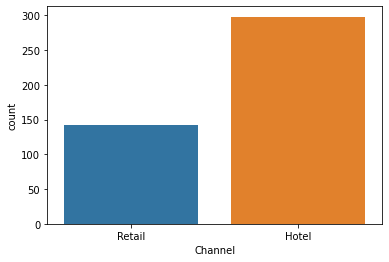

In [8]:
sns.countplot(x = "Channel", data=df)
plt.show()

In [9]:
df.groupby("Channel")["Total Spend"].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total Spend, dtype: int64

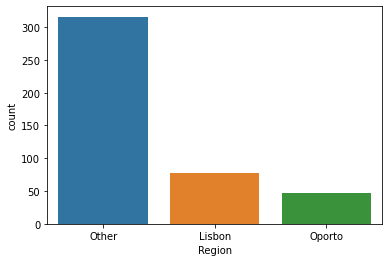

In [10]:
sns.countplot(x = "Region", data=df)
plt.show()

In [11]:
df.groupby("Region")["Total Spend"].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Spend, dtype: int64

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

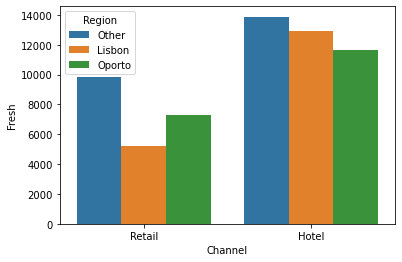

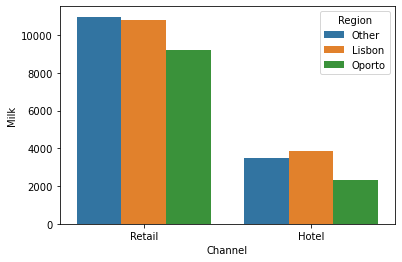

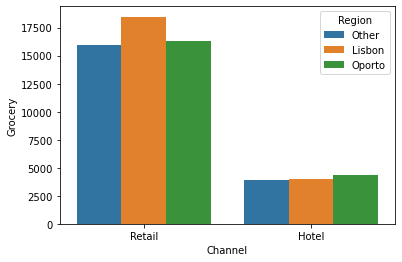

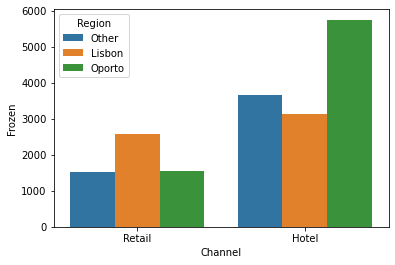

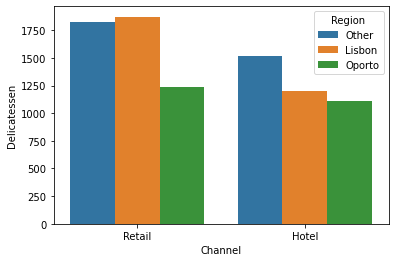

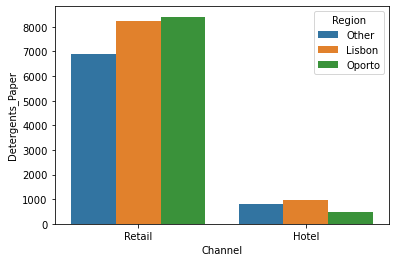

In [12]:
sns.barplot("Channel", "Fresh", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Milk", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Grocery", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Frozen", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Delicatessen", data=df, hue="Region", ci=None)
plt.show()

sns.barplot("Channel", "Detergents_Paper", data=df, hue="Region", ci=None)
plt.show()

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [13]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [14]:
cv(df)

NameError: name 'cv' is not defined

In [ ]:
data = [df["Fresh"], df["Milk"], df["Grocery"], df["Frozen"], df["Detergents_Paper"], df["Delicatessen"]] 
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
cv(df)

## 1.4 Are there any outliers in the data?

In [ ]:
plt.figure(figsize = (20,8))

sns.boxplot(data=df)
plt.show()

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective 

In [ ]:
sns.countplot("Region", data=df, hue="Channel")
plt.show()

### Conclusion:
Based on given sample data, the wholesale distributor must focus on below observations:
• Fresh items are more in demand Hotel channel
• Grocery items are more in demand Retail channel
• other region has great demand for Fresh items; hence they must increase the stock of Fresh items.
• Delicatessen items seemed to be less in demand in all the regions. 

# Problem 2

In [ ]:
prb2 = pd.read_csv("Survey-1.csv")

In [ ]:
prb2.head()

In [ ]:
prb2.info()

In [ ]:
prb2.describe(include="all")

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1 Gender and Major

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Major"])

### 2.1.2. Gender and Grad Intention

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Grad Intention"])

### 2.1.3. Gender and Employment

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Employment"])

### 2.1.4. Gender and Computer

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Computer"])

## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [ ]:
print("Total number of students is", prb2.Gender.count())
print("Total number of male students is", (prb2["Gender"]=="Male").sum())
print(" ")
print("Probability that a randomly selected CMSU student will be a male is", (prb2["Gender"]=="Male").sum()/prb2.Gender.count())

### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [ ]:
print("Total number of students is", prb2.Gender.count())
print("Total number of male students is", (prb2["Gender"]=="Female").sum())
print(" ")
print("Probability that a randomly selected CMSU student will be a male is", (prb2["Gender"]=="Female").sum()/prb2.Gender.count())

## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Major"])

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

#### Probability of male_Accounting is 13.8
#### Probability of male_CIS is 3.4
#### Probability of male_Economics_Finance is 13.8
#### Probability of male_International_Business is 6.9
#### Probability of male_Management is 20.7
#### Probability of male_Other is 13.8
#### Probability of male_Retailing_Marketing is 17.2
#### Probability of male_Undecided is 10.3 

## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

#### Probability of female_Accounting is 9.1
#### Probability of female_CIS is 9.1
#### Probability of female_Economics_Finance is 21.2
#### Probability of female_International_Business is 12.1
#### Probability of female_Management is 12.1
#### Probability of female_Other is 9.1
#### Probability of female_Retailing_Marketing is 27.3 
#### Probability of female_Undecided is 0.0

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Grad Intention"])

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [ ]:
print("Probability that a randomly chosen student is a male and intends to graduate is", 17/prb2.Gender.count())

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Computer"])

In [ ]:
print("Probability that a randomly chosen student is a female and does NOT have a laptop is", 4/prb2.Gender.count())

## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Employment"])

In [ ]:
print("Probability that a randomly chosen student is either a male or has a full employment is", 0.742)

### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Major"])

In [ ]:
print("Probability that given a female student is randomly chosen, she is majoring in international business or management is", 0.121)

## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [ ]:
x = {"No": (9,3), "Yes": (11,17)}
xsub = pd.DataFrame(data=x, index={"Female":0, "Male":1})
xsub

In [ ]:
print("Probability of female =", 20)
print("Probability of total students =", 40)
print("Number of student Graduation Intent Yes =", 38)
print("Number of female Graduation Intent Yes =", 11)
print("Probability of female =", 20/40)
print("Probability of student Graduation Intent Yes =", 28/40)
print("P(A)*P(B) =", 28/80)
print("Probability oF Graduation Intent Yes | Female =", 11/20)
print("P(A|B)*P(B) =", 11/40)
print("P(A)*P(B) =", 0.35)
print("P(A|B)*P(B) =", 0.275)

### The events are dependent

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## Answer the following questions based on the data

### 2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [ ]:
print("Number of students' whose GPA is less than 3 is", 17)
print("Probability of number of students’ whose GPA is less than 3 =", 17/prb2.Gender.count())

### 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [ ]:
pd.crosstab(prb2["Gender"], prb2["Salary"])

In [ ]:
print("Probability of male earning more than 50 =", 14/29)
print("Probability of female earning more than 50 =", 18/33)

## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [ ]:
sns.distplot(prb2["Salary"], norm_hist=True)
plt.show()

sns.distplot(prb2["GPA"], norm_hist=True)
plt.show()

sns.distplot(prb2["Spending"], norm_hist=True)
plt.show()

sns.distplot(prb2["Text Messages"], norm_hist=True)
plt.show()

# Problem 3

In [ ]:
ab = pd.read_csv("A+&+B+shingles.csv")

In [ ]:
ab.head()

In [ ]:
ab.describe()

In [ ]:
ab.info()

## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### A set

In [ ]:
t_statistics, p_value = stats.ttest_1samp(ab["A"], 0.35, nan_policy="omit")

In [ ]:
print("T-value is", t_statistics)
print("P value is", p_value/2)

#### B set

In [ ]:
t_statistic, p_value = ttest_1samp(ab["B"], 0.35, nan_policy='omit')
print("P value is", p_value/2)

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [ ]:
t_statistic, p_value = ttest_ind(ab["A"], ab["B"], nan_policy='omit')

In [ ]:
p_value